# Autoencoder

このnoteではNNでやってます  
CNNでやる場合は[こちら](https://elix-tech.github.io/ja/2016/07/17/autoencoder.html)の記事を参考に  
ノイズを加えたMNIST画像をautoencoderを通して元の画像を再生する

---

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
(X_train, _), (X_test, _) = mnist.load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
X_train = X_train.reshape((-1, 784)).astype('float')
X_train /= 255.
X_test = X_test.reshape((-1, 784)).astype('float')
X_test /= 255.

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [5]:
#ノイズを加える
noise_factor = 0.5
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

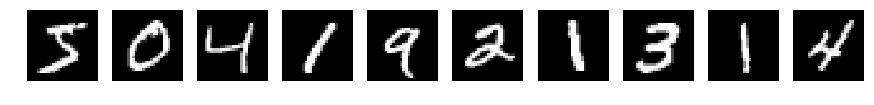

In [6]:
# 元データ
n = 10
_, ax = plt.subplots(ncols=n, figsize=(15, 2)) ####
for i in range(n):
    ax[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

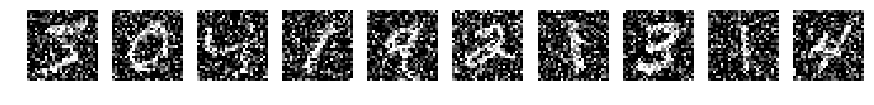

In [7]:
# ノイズを加えたデータ
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

In [8]:
# x_train_noisy → X_train となるように学習
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'mse')


hist = model.fit(x_train_noisy, X_train, epochs=20, batch_size=128,
                 verbose=1, validation_data=(x_test_noisy, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0472 - val_loss: 0.0297
Epoch 2/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0270 - val_loss: 0.0244
Epoch 3/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0238 - val_loss: 0.0229
Epoch 4/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0225 - val_loss: 0.0216
Epoch 5/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0214 - val_loss: 0.0208
Epoch 6/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0207 - val_loss: 0.0202
Epoch 7/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0201 - val_loss: 0.0197
Epoch 8/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0196 - val_loss: 0.0194
Epoch 9/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0191 - val_loss: 

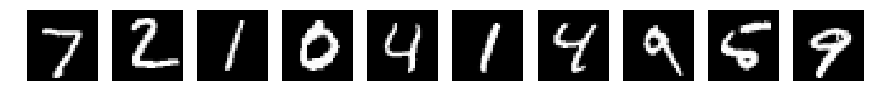

In [9]:
# テスト用データ
n = 10
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

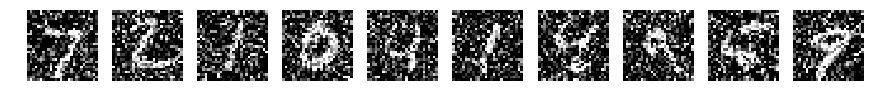

In [10]:
# ノイズを加えたテスト用
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

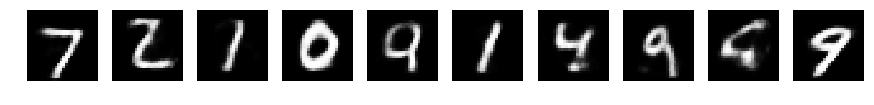

In [11]:
# ノイズを加えたテスト用をautoencoderに入れた結果
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(model.predict(x_test_noisy[i].reshape(1,784)).reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()